In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16  # You can set any numeric value here

In [3]:
problem_s_exageostat = [40000, 60000, 80000] #90000, 100000]
time_exageostat = [7.041170, 19.291832, 41.007014] #, 95.060418, 163.929003]
# gflop_exageostat = [5021.949664, 5541.964717, 5563.146135, 3716.191701, 2698.969065]

In [4]:
# cs_set = [16, 32, 64, 84, 108, 128]
cs_set = [10, 30, 60, 90, 120, 150]
num_set = np.asarray("40000 80000 120000 160000 200000 280000 360000 420000 500000 600000 700000 800000 900000 1000000".split(" "), dtype=int)
filename_template = 'perf_locs_{}_cs_{}_seed_{}'
file_folder = './log/v100'

perf_glops_all = []
perf_time_all = []

for seed in np.arange(5):
    _perf_glops = [[ ] for _ in range(len(cs_set))]
    _perf_time = [[ ] for _ in range(len(cs_set))]
    

    for j, cs in enumerate(cs_set):
        for _, locs_num in enumerate(num_set):
            filename = filename_template.format(locs_num, cs, seed)
            file_path = os.path.join(file_folder, filename)
            # Open the file
            try:
                with open(file_path, 'r') as file:
                    # Read all lines into a list
                    lines = file.readlines()

                    # Access the third and sixth lines
                    _time_total = float(lines[2].strip().split(" ")[0]) #- float(lines[2].strip().split("        ")[1])
                    _gflop_ops = float(lines[5].strip().split(" ")[0])
                    
                    _perf_glops[j].append(_gflop_ops)
                    _perf_time[j].append(_time_total)
            except FileNotFoundError:
                print(f"The file {file_path} does not exist.")
    perf_glops_all.append(_perf_glops)
    perf_time_all.append(_perf_time)

perf_glops_avg = []
perf_time_avg = []

for i_cs, _ in enumerate(cs_set):
    _perf_list = []
    _time_list = []
    for seed in range(5):
        _time_list.append(perf_time_all[seed][i_cs][:])
        _perf_list.append(perf_glops_all[seed][i_cs][:])
    perf_time_avg.append(np.asarray(_time_list).mean(axis=0)) # average of the 5 times
    perf_glops_avg.append(np.asarray(_perf_list).mean(axis=0)) # average of the 5 times
perf_time = perf_time_avg
perf_glops = perf_glops_avg

The file ./log/v100/perf_locs_500000_cs_90_seed_0 does not exist.
The file ./log/v100/perf_locs_600000_cs_90_seed_0 does not exist.
The file ./log/v100/perf_locs_700000_cs_90_seed_0 does not exist.
The file ./log/v100/perf_locs_800000_cs_90_seed_0 does not exist.
The file ./log/v100/perf_locs_900000_cs_90_seed_0 does not exist.
The file ./log/v100/perf_locs_1000000_cs_90_seed_0 does not exist.
The file ./log/v100/perf_locs_280000_cs_120_seed_0 does not exist.
The file ./log/v100/perf_locs_360000_cs_120_seed_0 does not exist.
The file ./log/v100/perf_locs_420000_cs_120_seed_0 does not exist.
The file ./log/v100/perf_locs_500000_cs_120_seed_0 does not exist.
The file ./log/v100/perf_locs_600000_cs_120_seed_0 does not exist.
The file ./log/v100/perf_locs_700000_cs_120_seed_0 does not exist.
The file ./log/v100/perf_locs_800000_cs_120_seed_0 does not exist.
The file ./log/v100/perf_locs_900000_cs_120_seed_0 does not exist.
The file ./log/v100/perf_locs_1000000_cs_120_seed_0 does not exist.

In [5]:
perf_time

[array([0.0059256, 0.0117604, 0.0168612, 0.0203942, 0.0261514, 0.0398302,
        0.0471344, 0.054023 , 0.0707918, 0.076905 , 0.0868748, 0.1045052,
        0.1065944, 0.1181178]),
 array([0.0111658, 0.0218438, 0.0308532, 0.0426822, 0.05126  , 0.0714658,
        0.0908928, 0.1046864, 0.1253876, 0.146335 , 0.1694326, 0.1892626,
        0.2185566, 0.244432 ]),
 array([0.0315862, 0.060051 , 0.0917   , 0.117841 , 0.1450146, 0.2025394,
        0.261734 , 0.303542 , 0.368262 , 0.4444198, 0.5089172, 0.5820586,
        0.6629806, 0.7370806]),
 array([0.0670272, 0.1292008, 0.1965134, 0.2582244, 0.3222368, 0.444826 ,
        0.5768278, 0.6757962]),
 array([0.1078208, 0.2158692, 0.3200534, 0.4321282, 0.5420318]),
 array([0.1732288, 0.3401814, 0.5106008, 0.6886384])]

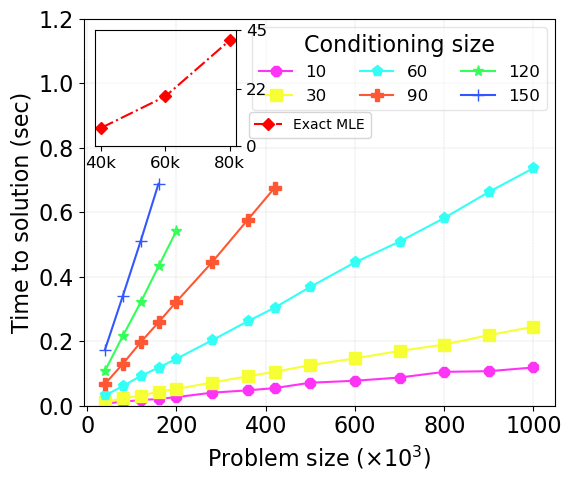

In [30]:
# Create a plot with a larger size and a better style
plt.figure(figsize=(6, 5))

# colors = cm.Greens(np.linspace(0.2, 0.8, len(num_set)))
colors = [
    "#FF33F6",  # Magenta
    "#F6FF33",  # Yellow
    "#33FFF6",  # Cyan
    "#FF5733",  # Reddish-orange
    "#33FF57",  # Bright green
    "#3357FF",  # Royal blue
    "#8B4513",  # Saddle brown
    "#FF69B4"   # Hot pink
]
markers = ["8", "s", "p", "P", "*", "+", "D", "v", "^"]
# Plot both arrays with different colors and line styles
for i, num_cs in enumerate(cs_set):
    _yy = perf_time[i]
    plt.plot(np.asarray(num_set[:len(_yy)])/1000, np.asarray(_yy), color=colors[i], 
             linewidth=1.5, marker=markers[i], label=str(num_cs), markersize=8)
# tick modification
_list_xtick = [40, 200, 420, 600, 800, 1000]
# _list_xtick_name = [f'{int(tick)}k' for tick in _list_xtick]
# plt.xticks(_list_xtick, _list_xtick_name)
# plt.axvline(160, ymin=0, ymax=0.18, color=colors[len(cs_set) - 1], linestyle='-.', linewidth=2.0)
# plt.axvline(200, ymin=0, ymax=0.19, color=colors[len(cs_set) - 2], linestyle='-.', linewidth=2.0)
# plt.axvline(420, ymin=0, ymax=0.35, color=colors[len(cs_set) - 3], linestyle='-.', linewidth=2.0)
# plt.yscale('log')

# Adding enhanced legend, title, and labels
legend = plt.legend(ncol = 3, fontsize=12,
                    title = 'Conditioning size') #loc='lower center', bbox_to_anchor=(0.5, -0.3) 
legend.get_frame().set_alpha(0.5)  # 50% transparency
plt.xlabel(r'Problem size ($\times 10^3$)')
plt.ylabel('Time to solution (sec)')

# Adding grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.2)
plt.tight_layout()
# plt.yscale('log')
plt.ylim(0, 1.2)


def set_inner_plot():
    # Parameters: [left, bottom, width, height] as a fraction of the parent plot
    ax_inset = inset_axes(plt.gca(), width="30%", height="30%", 
                          loc='upper left')

    # Now plot on the inset axes. Example:
    ax_inset.plot(np.asarray(problem_s_exageostat)/1000, time_exageostat, linestyle='-.',
                  color='red', linewidth=1.5, marker=markers[i+1], label = 'Exact MLE')
    ax_inset.patch.set_alpha(0.5)  # 50% transparent
    # ax_inset.grid(True, which='both', linestyle='--', linewidth=0.2)
    _list_xtick_exageostat = list(np.asarray([40, 60, 80]))
    ax_inset.set_xticks(_list_xtick_exageostat,
                        [f'{int(tick)}k' for tick in _list_xtick_exageostat],
                        fontsize = 12)
    _list_ytick_exageostat = list(np.asarray([0, 22, 45]))# 60, 120, 180]))
    ax_inset.set_yticks(_list_ytick_exageostat,
                        _list_ytick_exageostat,
                        fontsize = 12)
    # # You can set properties for the inset axes if needed, like labels, title, etc.
    # ax_inset.set_xlabel('Small X label')
    # ax_inset.set_ylabel('Small Y label')
    # ax_inset.set_title('Inset Title')
    ax_inset.yaxis.tick_right()
    ax_inset.legend(loc='best', fontsize=10,  bbox_to_anchor=(2.0, 0.35))

    # # Adjust the view limits or other properties of the inset
    # ax_inset.set_xlim(...) # Specify your limits here
    # ax_inset.set_ylim(...) # Specify your limits here
set_inner_plot()


plt.savefig(f'./fig/perf_time_v100.pdf')
plt.show()

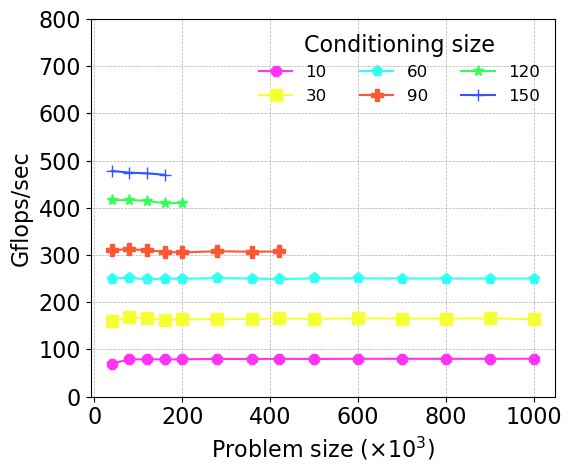

In [5]:
# Create a plot with a larger size and a better style
plt.figure(figsize=(6, 5))

# Plot both arrays with different colors and line styles
for i, num_cs in enumerate(cs_set):
    _yy = perf_glops[i]
    plt.plot(np.asarray(num_set[:len(_yy)])/1000, np.asarray(_yy), color=colors[i], 
             linewidth=1.5, marker=markers[i], label=str(num_cs), markersize=8)
# plt.axvline(160, ymin=0, ymax=0.55, color=colors[len(cs_set) - 1], linestyle='-.', linewidth=2.0)
# plt.axvline(200, ymin=0, ymax=0.5, color=colors[len(cs_set) - 2], linestyle='-.', linewidth=2.0)
# plt.axvline(420, ymin=0, ymax=0.4, color=colors[len(cs_set) - 3], linestyle='-.', linewidth=2.0)

# 500
# plt.plot(500/1000, 1313.78, color=colors[i+1], 
#         linewidth=1.5, marker=markers[i+1], label=str(500), markersize=8)
# # 1000
# plt.plot(1000/1000, 2271.97, color=colors[i+2], 
#         linewidth=1.5, marker=markers[i+2], label=str(1000), markersize=8)

# Adding enhanced legend, title, and labels
legend = plt.legend(ncol = 3, fontsize=12,
                    title = 'Conditioning size') #loc='lower center', bbox_to_anchor=(0.5, -0.3) 
legend.get_frame().set_alpha(0)  # 50% transparency
plt.xlabel(r'Problem size ($\times 10^3$)')
plt.ylabel('Gflops/sec')
plt.ylim(0, 800)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig(f'./fig/perf_gflops_v100.pdf')
plt.show()

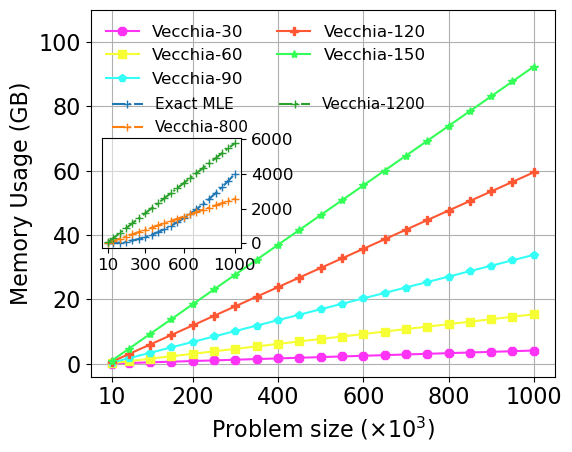

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rcParams['font.size'] = 16  # You can set any numeric value here

data = pd.read_csv('./log/mem_gflops/mem.csv', delimiter=' ')
xx = [10, 200, 400, 600, 800, 1000]

# Plotting the data
plt.figure(figsize=(6, 4.8))

# Plot each column against N
for i, column in enumerate(data.columns[2:-3]):
    plt.plot(data['N']/1000, data[column], marker=markers[i], color = colors[i], label=column)

# plt.title('Memory Usage Comparison')
plt.xlabel(r'Problem size ($\times 10^3$)')
plt.ylabel('Memory Usage (GB)')
# _list_xtick_name = [f'{int(tick)}k' for tick in _list_xtick]
plt.xticks(xx, xx)
plt.ylim(-4, 110)
legend = plt.legend(loc='upper left', ncol = 2, fontsize =12)
legend.get_frame().set_alpha(0)  # 50% transparency
plt.grid(True)
plt.tight_layout()


def set_inner_plot():
    # Parameters: [left, bottom, width, height] as a fraction of the parent plot
    ax_inset = inset_axes(plt.gca(), width="30%", height="30%", 
                          loc='center left')

    # Now plot on the inset axes. Example:
    ax_inset.plot(data['N']/1000, data['FullMLE'], linestyle='-.',
                  # color='red', 
                #   linewidth=1.5, 
                  marker=markers[i+1], 
                  label = 'Exact MLE')
    ax_inset.plot(data['N']/1000, data['vecchia-800'], linestyle='-.',
                  # color='red', 
                #   linewidth=1.5, 
                  marker=markers[i+1], 
                  label = 'Vecchia-800')
    ax_inset.plot(data['N']/1000, data['vecchia-1200'], linestyle='-.',
                  # color='red', 
                #   linewidth=1.5, 
                  marker=markers[i+1], 
                  label = 'Vecchia-1200')
    ax_inset.patch.set_alpha(0.5)  # 50% transparent
    # ax_inset.grid(True, which='both', linestyle='--', linewidth=0.2)
    _list_xtick_exageostat = list(np.asarray([10, 300, 600, 1000]))
    ax_inset.set_xticks(_list_xtick_exageostat,
                        _list_xtick_exageostat,
                        fontsize = 12)
    _list_ytick_exageostat = list(np.asarray([0, 2000, 4000, 6000]))# 60, 120, 180]))
    ax_inset.set_yticks(_list_ytick_exageostat,
                        _list_ytick_exageostat,
                        fontsize = 12)
    # # You can set properties for the inset axes if needed, like labels, title, etc.
    # ax_inset.set_xlabel('Small X label')
    # ax_inset.set_ylabel('Small Y label')
    # ax_inset.set_title('Inset Title')
    ax_inset.yaxis.tick_right()
    legend_sub = ax_inset.legend(loc='center', ncol = 2, fontsize=11,  bbox_to_anchor=(1.2, 1.2))
    legend_sub.get_frame().set_alpha(0)  # 50% transparency
    # # Adjust the view limits or other properties of the inset
    # ax_inset.set_xlim(...) # Specify your limits here
    # ax_inset.set_ylim(...) # Specify your limits here
set_inner_plot()
plt.savefig('./fig/perf_mem.pdf')
plt.show()


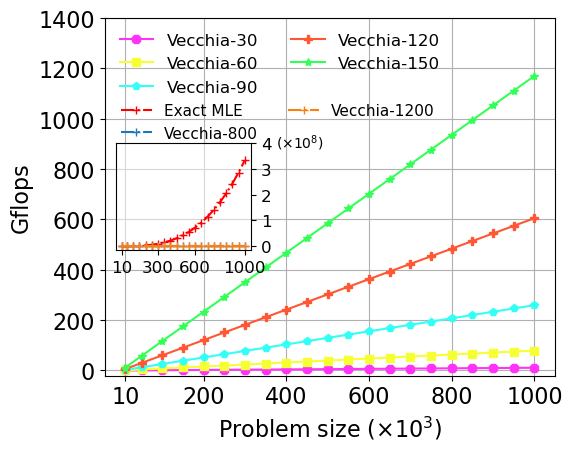

In [7]:
data_gflops = pd.read_csv('./log/mem_gflops/gflops.csv', delimiter=' ')

# Plotting the data_gflops
plt.figure(figsize=(6, 4.8))

# Plot each column against N
for i, column in enumerate(data_gflops.columns[2:-5]):
    plt.plot(data_gflops['N']/1000, data_gflops[column], marker=markers[i], color = colors[i], label=column)

# plt.title('Memory Usage Comparison')
plt.xlabel(r'Problem size ($\times 10^3$)')
plt.ylabel('Gflops')
# _list_xtick_name = [f'{int(tick)}k' for tick in _list_xtick]
plt.xticks(xx, xx)
plt.ylim(-20, 1400)
legend = plt.legend(loc='upper left', ncol = 2, fontsize =12)
legend.get_frame().set_alpha(0)  # 50% transparency
plt.grid(True)
plt.tight_layout()


def set_inner_plot():
    # Parameters: [left, bottom, width, height] as a fraction of the parent plot
    ax_inset = inset_axes(plt.gca(), width="30%", height="30%", 
                          loc='center left')

    # Now plot on the inset axes. Example:
    ax_inset.plot(data_gflops['N']/1000, data_gflops['FullMLE'], linestyle='-.',
                  color='red', 
                #   linewidth=1.5, 
                  marker=markers[i+1], 
                  label = 'Exact MLE')
    ax_inset.plot(data['N']/1000, data['vecchia-800'], linestyle='-.',
                  # color='red', 
                #   linewidth=1.5, 
                  marker=markers[i+1], 
                  label = 'Vecchia-800')
    ax_inset.plot(data['N']/1000, data['vecchia-1200'], linestyle='-.',
                  # color='red', 
                #   linewidth=1.5, 
                  marker=markers[i+1], 
                  label = 'Vecchia-1200')
    ax_inset.patch.set_alpha(0.5)  # 50% transparent
    # ax_inset.grid(True, which='both', linestyle='--', linewidth=0.2)
    _list_xtick_exageostat = list(np.asarray([10, 300, 600, 1000]))
    ax_inset.set_xticks(_list_xtick_exageostat,
                        _list_xtick_exageostat,
                        fontsize = 12)
    _list_ytick_exageostat = [0, 1e8, 2e8, 3e8, 4e8]
    _list_ytick_exageostat_names = [0, 1, 2, 3, 4]
    ax_inset.set_yticks(_list_ytick_exageostat,
                        _list_ytick_exageostat_names,
                        fontsize = 12)
    # # You can set properties for the inset axes if needed, like labels, title, etc.
    # ax_inset.set_xlabel('Small X label')
    # ax_inset.set_ylabel('Small Y label')
    # ax_inset.set_title('Inset Title')
    ax_inset.yaxis.tick_right()
    legend_sub = ax_inset.legend(loc='center', ncol = 2, fontsize=11,  bbox_to_anchor=(1.2, 1.2))
    legend_sub.get_frame().set_alpha(0)  # 50% transparency

    # # Adjust the view limits or other properties of the inset
    # ax_inset.set_xlim(...) # Specify your limits here
    # ax_inset.set_ylim(...) # Specify your limits here
set_inner_plot()
plt.text(1000*1.25, 4e8*0.96, r"$(\times 10^8)$", fontsize=10)
plt.savefig('./fig/perf_gflops.pdf')
plt.show()
